<a href="https://colab.research.google.com/github/twice1st/Detecting-and-Beautifying-Vietnamese-Faces/blob/main/Source%20code/Classification_using_KNN_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import cv2
import numpy as np
import pickle

# Đọc file Vector embedding

In [ ]:
def _save_pickle(obj, file_path):
  with open(file_path, 'wb') as f:
    pickle.dump(obj, f)

def _load_pickle(file_path):
  with open(file_path, 'rb') as f:
    obj = pickle.load(f)
  return obj

In [ ]:
# embedding = _load_pickle("/content/drive/MyDrive/CS231/file/Trong/embed_blob_faces.pkl")
embedding_sm1 = _load_pickle("/content/drive/MyDrive/CS231/file/Trong/embed_blob_faces_sm1.pkl")
embedding_sm2 = _load_pickle("/content/drive/MyDrive/CS231/file/Trong/embed_blob_faces_sm2.pkl")
embedding_v2 = _load_pickle("/content/drive/MyDrive/CS231/file/Trong/embed_blob_faces_v2.pkl")
labels =  _load_pickle("/content/drive/MyDrive/CS231/file/Trong/labels.pkl")

In [ ]:
embedding_sm1_no_processing = _load_pickle("/content/drive/MyDrive/CS231/file/Trong/embed_blob_faces_sm1_no_processing.pkl")
embedding_sm2_no_processing = _load_pickle("/content/drive/MyDrive/CS231/file/Trong/embed_blob_faces_sm2_no_processing.pkl")
embedding_v2_no_processing = _load_pickle("/content/drive/MyDrive/CS231/file/Trong/embed_blob_faces_v2_no_processing.pkl")

In [ ]:
train_ids =  _load_pickle("/content/drive/MyDrive/CS231/file/Trong/id_train.pkl")
test_ids = _load_pickle("/content/drive/MyDrive/CS231/file/Trong/id_test.pkl")

# Tiền xử lý dữ liệu 

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np
# scaler= StandardScaler()
# X = np.array(embedding)
# X=X.reshape(19589,1*128)
# X = scaler.fit_transform(X)

In [ ]:
def preprocess(embedding, labels):
    scaler= StandardScaler()
    X = np.array(embedding)
    X=X.reshape(19589,1*128)
    X = scaler.fit_transform(X)
    y= np.array(labels)
    y = y.astype(np.int)
    X_train= [ X[i] for i in train_ids]
    y_train= [ y[i] for i in train_ids]
    X_test = [ X[i] for i in test_ids]
    y_test = [ y[i] for i in test_ids]
    X_train,y_train,X_test,y_test = np.array(X_train), np.array(y_train),np.array(X_test),np.array(y_test)
    return X_train,y_train,X_test,y_test

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
class_names= ["Other","Vietnamese"]

In [ ]:
def draw_cf_matrix(cf_matrix, class_names):
    df_cm = pd.DataFrame(cf_matrix, index = [i for i in class_names],
                    columns = [i for i in class_names])
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=True,fmt='g')

In [ ]:
pip install cPickle

ERROR: Could not find a version that satisfies the requirement cPickle (from versions: none)
ERROR: No matching distribution found for cPickle


In [ ]:
import sklearn.externals 
import joblib
import pickle

In [ ]:
import cPickle
# save the classifier
with open('/content/drive/MyDrive/CS231/knn.pkl', 'wb') as fid:
    cPickle.dump(clf, fid)    

# load it again
with open('my_dumped_classifier.pkl', 'rb') as fid:
    gnb_loaded = cPickle.load(fid)

In [ ]:
def classification(embedding, labels):
  X_train,y_train,X_test,y_test = preprocess(embedding, labels)
  
  clf = KNeighborsClassifier(n_neighbors = 37).fit(X_train,y_train)
  with open('/content/drive/MyDrive/CS231/knn.pkl', 'wb') as fid:
    pickle.dump(clf, fid)
  y_pred = (clf.predict(X_test) > 0.5).astype("int32")
  y_pred= y_pred.reshape(y_pred.shape[0])

  y_pred = y_pred.astype('str')
  for i in range(len(y_pred)):
        y_pred[i] = class_names[int(y_pred[i])]

  y_test = y_test.astype('str')
  for i in range (len(y_test)):
      if y_test[i]=='0':
        y_test[i]="Other"
      else:
            y_test[i]="Vietnamese"
    
  print('Classification Report')
  print(classification_report(y_test, y_pred, target_names=class_names))  
    
  cf_matrix = confusion_matrix(y_test, y_pred)
  draw_cf_matrix(cf_matrix, class_names)

In [ ]:
X_train,y_train,X_test,y_test = preprocess(embedding_sm1, labels)

optimal k: 37


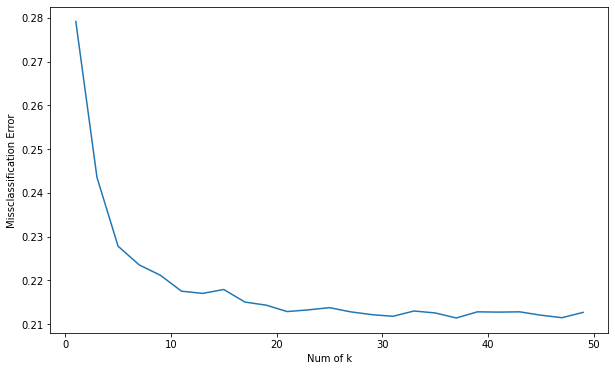

In [ ]:
MSE = [1-x for x in cv_score]
optimal_k = nei[MSE.index(min(MSE))]
print("optimal k:", optimal_k)

plt.figure(figsize = (10,6))
plt.plot(nei,MSE)
plt.xlabel("Num of k")
plt.ylabel("Missclassification Error")
plt.show()

#Đánh giá trên file embedding sm1

Classification Report
              precision    recall  f1-score   support

       Other       0.81      0.73      0.77      1918
  Vietnamese       0.76      0.84      0.80      2000

    accuracy                           0.78      3918
   macro avg       0.79      0.78      0.78      3918
weighted avg       0.79      0.78      0.78      3918



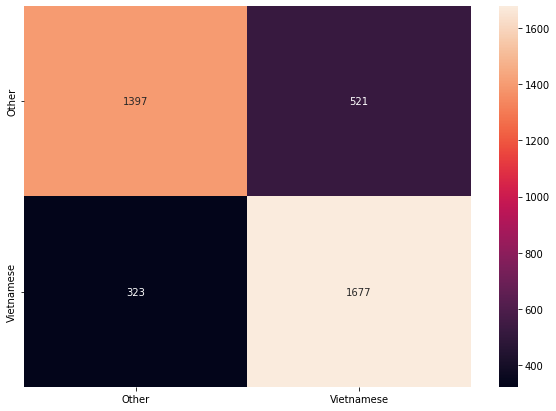

In [ ]:
#classification(embedding_sm1,labels)
X_train,y_train,X_test,y_test = preprocess(embedding_sm1, labels)
  
clf = KNeighborsClassifier(n_neighbors = 37).fit(X_train,y_train)
  
y_pred = (clf.predict(X_test) > 0.5).astype("int32")
y_pred= y_pred.reshape(y_pred.shape[0])

y_pred = y_pred.astype('str')
for i in range(len(y_pred)):
  y_pred[i] = class_names[int(y_pred[i])]

y_test = y_test.astype('str')
for i in range (len(y_test)):
  if y_test[i]=='0':
      y_test[i]="Other"
  else:
      y_test[i]="Vietnamese"
    
print('Classification Report')
print(classification_report(y_test, y_pred, target_names=class_names))  
    
cf_matrix = confusion_matrix(y_test, y_pred)
draw_cf_matrix(cf_matrix, class_names)

#Đánh giá trên file embedding sm1 chưa tiền xử lý

Classification Report
              precision    recall  f1-score   support

       Other       0.58      0.53      0.56      1918
  Vietnamese       0.59      0.64      0.61      2000

    accuracy                           0.59      3918
   macro avg       0.59      0.59      0.58      3918
weighted avg       0.59      0.59      0.59      3918



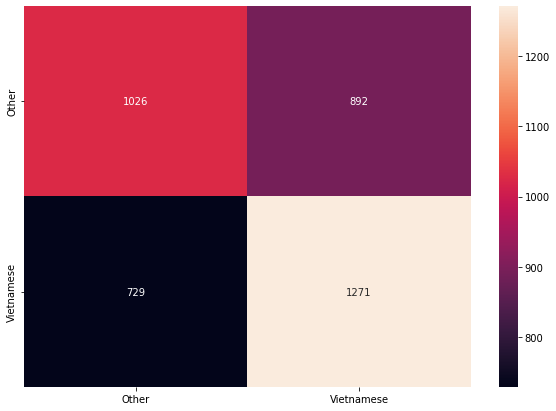

In [ ]:
#classification(embedding_sm1_no_processing,labels)
X_train,y_train,X_test,y_test = preprocess(embedding_sm1_no_processing, labels)
  
clf = KNeighborsClassifier(n_neighbors = 37).fit(X_train,y_train)
  
y_pred = (clf.predict(X_test) > 0.5).astype("int32")
y_pred= y_pred.reshape(y_pred.shape[0])

y_pred = y_pred.astype('str')
for i in range(len(y_pred)):
  y_pred[i] = class_names[int(y_pred[i])]

y_test = y_test.astype('str')
for i in range (len(y_test)):
  if y_test[i]=='0':
      y_test[i]="Other"
  else:
      y_test[i]="Vietnamese"
    
print('Classification Report')
print(classification_report(y_test, y_pred, target_names=class_names))  
    
cf_matrix = confusion_matrix(y_test, y_pred)
draw_cf_matrix(cf_matrix, class_names)

In [ ]:
a = 0
for i in range(len(y_test)):
  if y_pred[i] != y_test[i]:
    a+=1
a

1621

#Đánh giá trên file embedding sm2

Classification Report
              precision    recall  f1-score   support

       Other       0.81      0.73      0.77      1918
  Vietnamese       0.77      0.84      0.80      2000

    accuracy                           0.79      3918
   macro avg       0.79      0.79      0.79      3918
weighted avg       0.79      0.79      0.79      3918



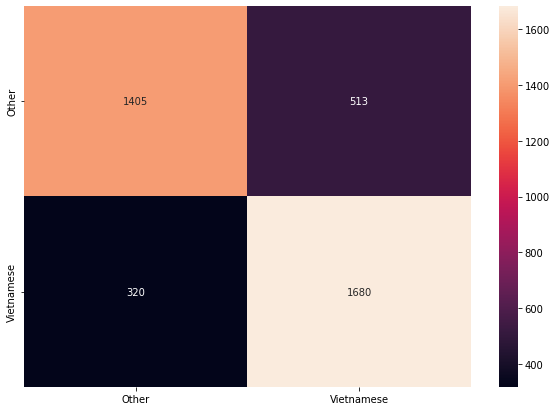

In [ ]:
classification(embedding_sm2,labels)

#Đánh giá trên file embedding sm2 chưa tiền xử lý

Classification Report
              precision    recall  f1-score   support

       Other       0.60      0.57      0.59      1918
  Vietnamese       0.61      0.64      0.62      2000

    accuracy                           0.61      3918
   macro avg       0.61      0.61      0.61      3918
weighted avg       0.61      0.61      0.61      3918



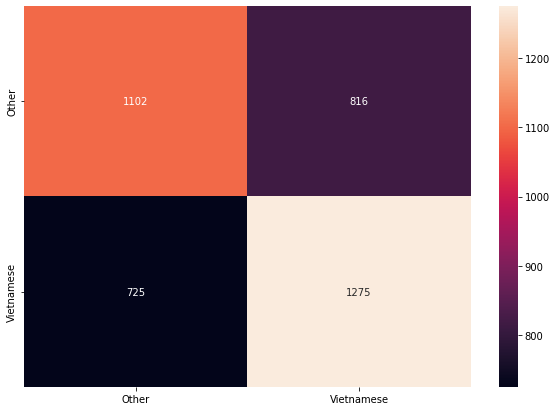

In [ ]:
#classification(embedding_sm2_no_processing,labels)
X_train,y_train,X_test,y_test = preprocess(embedding_sm2_no_processing, labels)
  
clf = KNeighborsClassifier(n_neighbors = 37).fit(X_train,y_train)
  
y_pred = (clf.predict(X_test) > 0.5).astype("int32")
y_pred= y_pred.reshape(y_pred.shape[0])

y_pred = y_pred.astype('str')
for i in range(len(y_pred)):
  y_pred[i] = class_names[int(y_pred[i])]

y_test = y_test.astype('str')
for i in range (len(y_test)):
  if y_test[i]=='0':
      y_test[i]="Other"
  else:
      y_test[i]="Vietnamese"
    
print('Classification Report')
print(classification_report(y_test, y_pred, target_names=class_names))  
    
cf_matrix = confusion_matrix(y_test, y_pred)
draw_cf_matrix(cf_matrix, class_names)

In [ ]:
a = 0
for i in range(len(y_test)):
  if y_pred[i] != y_test[i]:
    a+=1
a

1541

#Đánh giá trên file embedding v2

Classification Report
              precision    recall  f1-score   support

       Other       0.73      0.74      0.74      1918
  Vietnamese       0.75      0.73      0.74      2000

    accuracy                           0.74      3918
   macro avg       0.74      0.74      0.74      3918
weighted avg       0.74      0.74      0.74      3918



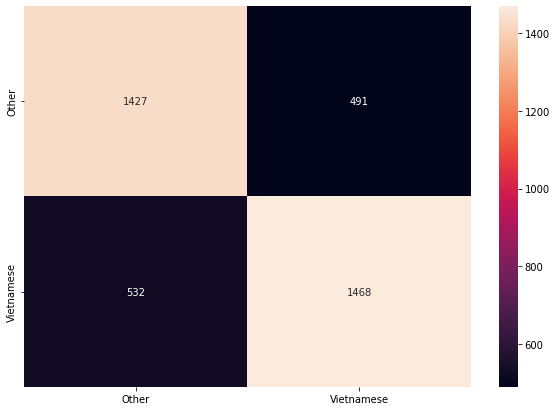

In [ ]:
classification(embedding_v2,labels)

#Đánh giá trên file embedding v2 chưa tiền xử lý

Classification Report
              precision    recall  f1-score   support

       Other       0.57      0.50      0.53      1918
  Vietnamese       0.57      0.64      0.60      2000

    accuracy                           0.57      3918
   macro avg       0.57      0.57      0.56      3918
weighted avg       0.57      0.57      0.57      3918



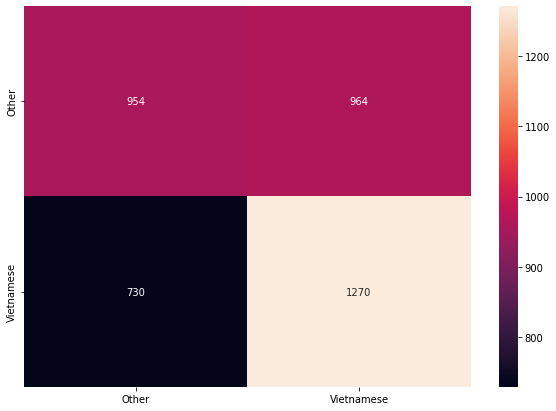

In [ ]:
#classification(embedding_v2_no_processing,labels)
X_train,y_train,X_test,y_test = preprocess(embedding_v2_no_processing, labels)
  
clf = KNeighborsClassifier(n_neighbors = 37).fit(X_train,y_train)
  
y_pred = (clf.predict(X_test) > 0.5).astype("int32")
y_pred= y_pred.reshape(y_pred.shape[0])

y_pred = y_pred.astype('str')
for i in range(len(y_pred)):
  y_pred[i] = class_names[int(y_pred[i])]

y_test = y_test.astype('str')
for i in range (len(y_test)):
  if y_test[i]=='0':
      y_test[i]="Other"
  else:
      y_test[i]="Vietnamese"
    
print('Classification Report')
print(classification_report(y_test, y_pred, target_names=class_names))  
    
cf_matrix = confusion_matrix(y_test, y_pred)
draw_cf_matrix(cf_matrix, class_names)